### Student Performance Prediction

In [156]:
import pandas as pd 
import numpy as np 

In [157]:
df = pd.read_csv('../Student Performance Prediction/final_student_data.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,ExamScore,Result
0,1001,17,Male,Asian,Secondary,19.833723,7,1,Moderate,No,No,Yes,No,73.0,Pass
1,1002,18,Female,Asian,Primary,15.408756,0,0,Low,No,No,No,No,76.0,Pass
2,1003,15,Female,Hispanic,Higher Education,4.210570,26,0,Moderate,No,No,No,No,3.0,Fail
3,1004,17,Male,Asian,Higher Education,10.028829,14,0,High,Yes,No,No,No,51.0,Pass
4,1005,17,Male,Asian,Secondary,4.672495,17,1,High,No,No,No,No,32.0,Fail


In [158]:
df.dtypes

StudentID              int64
Age                    int64
Gender                object
Ethnicity             object
ParentalEducation     object
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport       object
Extracurricular       object
Sports                object
Music                 object
Volunteering          object
ExamScore            float64
Result                object
dtype: object

In [159]:
df.isna().sum()

StudentID              0
Age                    0
Gender                 0
Ethnicity              0
ParentalEducation    243
StudyTimeWeekly        0
Absences               0
Tutoring               0
ParentalSupport      212
Extracurricular        0
Sports                 0
Music                  0
Volunteering           0
ExamScore              0
Result                 0
dtype: int64

In [160]:
df2 = df.dropna()
df2.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
ExamScore            0
Result               0
dtype: int64

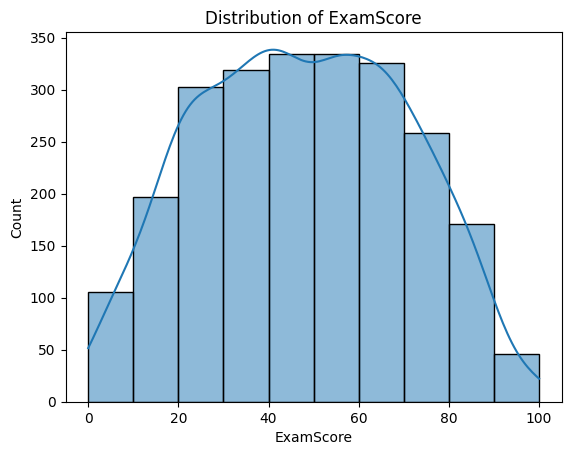

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# Histogram of scores
sns.histplot(df['ExamScore'], bins=10, kde=True)
plt.title('Distribution of ExamScore')
plt.xlabel('ExamScore')
plt.ylabel('Count')
plt.show()

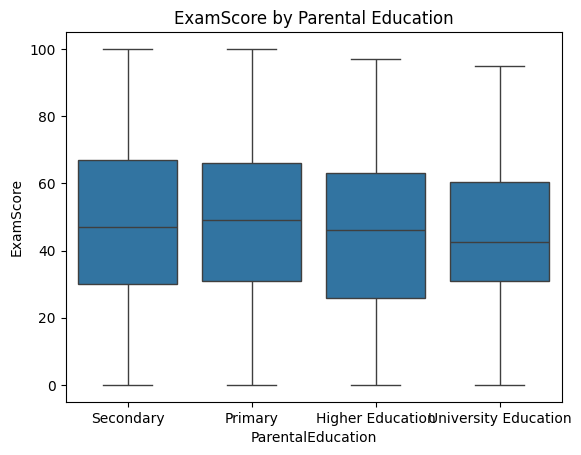

In [162]:
# Boxplot: GPA by Parental Education
sns.boxplot(x='ParentalEducation', y='ExamScore', data=df)
plt.title('ExamScore by Parental Education')
plt.show()

In [163]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'Result']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_x = transformer.fit_transform(df.drop('ExamScore', axis=1))
transformed_x


array([[ 0.        ,  1.        ,  1.        , ..., 19.83372281,
         7.        ,  1.        ],
       [ 1.        ,  0.        ,  1.        , ..., 15.40875606,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  4.21056977,
        26.        ,  0.        ],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  6.80549964,
        20.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ..., 12.41665266,
        17.        ,  0.        ],
       [ 0.        ,  1.        ,  1.        , ..., 17.81990749,
        13.        ,  0.        ]])

In [164]:
pd.DataFrame(transformed_x)


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1001.0,17.0,19.833723,7.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1002.0,18.0,15.408756,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1003.0,15.0,4.210570,26.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1004.0,17.0,10.028829,14.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1005.0,17.0,4.672495,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,3388.0,18.0,10.680555,2.0,0.0
2388,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,3389.0,17.0,7.583217,4.0,1.0
2389,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,3390.0,16.0,6.805500,20.0,0.0
2390,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,3391.0,16.0,12.416653,17.0,0.0


In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Split into x/y
x = df.drop('ExamScore', axis=1)
x = pd.get_dummies(x)

y = df['ExamScore']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()

In [166]:
model.fit(x_train, y_train)

LinearRegression()

In [185]:
y_pred = model.predict(x_test)
y_pred

array([ 36.12827831,  73.01883668,  47.56050332,  87.49072072,
         7.35354063,  68.08672779,  44.29988287,  60.11544843,
        55.06321737,  25.15343675,  63.45003933,  15.57400958,
        77.65589608,  69.06616783,  71.95638307,   9.03036236,
        26.51125187,  37.00607677,  53.02029462,  68.46106019,
        54.30514964,  39.65246057,  41.76562471,  82.0774236 ,
        43.66673983,  14.2932374 ,  40.3301061 ,  64.02864853,
        53.45918804,  47.94974795,  51.41660916,  18.58364541,
        75.59087056,  78.64589799,  35.49463366,  45.79690254,
        78.56277174,  72.85032498,  80.9140104 ,  19.6219744 ,
        69.05026586,  85.1502914 ,  27.82799493,  57.72802169,
        22.37265454,  66.55316515,  75.64321454,  27.12298132,
        70.54660517,  37.67586144,  77.54252755,  76.36444285,
        38.02559741,  28.86460383,  42.72218923,  85.8847452 ,
        62.43254875,  83.45951716,  24.93088826,  54.69898574,
        42.05482877,  49.85881357,  60.27802531,  35.37

In [186]:
from sklearn.metrics import r2_score, mean_squared_error, f1_score
r2 = r2_score(y_test,y_pred)
r2

0.9562789287883451

In [187]:
mse = mean_squared_error(y_test,y_pred)
mse

22.59213510547181

In [188]:
model.coef_

array([ 4.95737731e-04, -8.38139396e-02,  6.75846155e-01, -2.26241483e+00,
        6.11955230e+00, -1.34049809e-01,  1.34049809e-01, -1.50377627e-01,
        6.75185258e-02,  3.76536579e-02,  4.52054433e-02, -3.86216388e-01,
        3.73881512e-03,  1.95314187e-01,  4.85408512e-01,  1.06115502e+01,
        3.89870151e+00,  7.19634515e+00,  1.41382038e+01, -2.22028894e+00,
        2.22028894e+00, -2.19016555e+00,  2.19016555e+00, -1.80277988e+00,
        1.80277988e+00, -4.89778594e-02,  4.89778594e-02, -2.34586829e+00,
        2.34586829e+00])

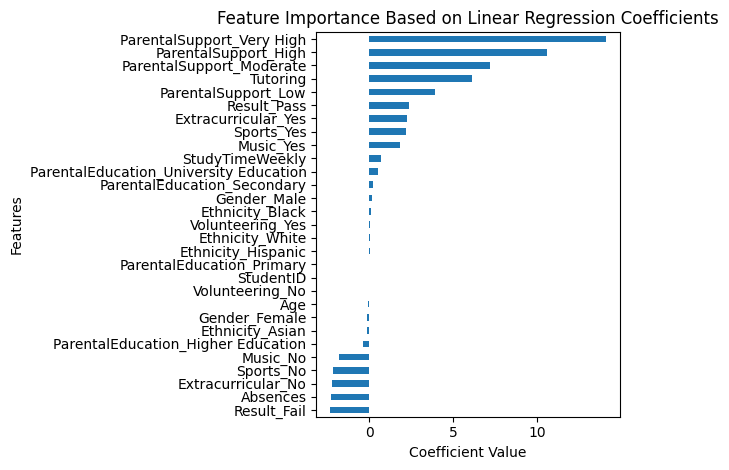

In [189]:

cofficients = pd.Series(model.coef_, index=x_train.columns) 
cofficients = cofficients.sort_values()

plt.Figure(figsize=(8,6))
cofficients.plot(kind="barh")
plt.title('Feature Importance Based on Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()